In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def plot_digit(pixels, label):
    img = pixels.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(label)

In [3]:
labeled_images = pd.read_csv('../input/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

In [4]:
clf = RandomForestClassifier(n_jobs=2)
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.872

In [5]:
def test_prediction(index):
    predic = clf.predict(test_images.iloc[index:index+1])[0]
    actual = test_labels.iloc[index]['label']
    return (predic, actual)

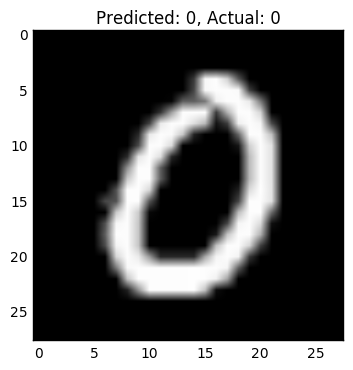

In [6]:
import random

index = random.randint(0, len(test_images)-1)
predic, actual = test_prediction(index)

pixels = test_images.iloc[index].as_matrix()
label = "Predicted: {0}, Actual: {1}".format(predic, actual)

plot_digit(pixels, label)